In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time 
import pickle

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor

from google.colab import files

In [2]:
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 60.6MB 45.3MB/s 


In [3]:
!pip install lightgbm --install-option=--gpu
from lightgbm.sklearn import LGBMRegressor

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
def get_loss(pred, actual):
  loss = mean_squared_error(pred, actual)
  result = np.sqrt(loss)
  return result

In [0]:
def kfold_validate(X, y, te, model, col):
    scores = np.zeros(k)
    for i, (tr_idx, val_idx) in enumerate(cv.split(X)):
        X_tr, y_tr = X.iloc[tr_idx, :], y[tr_idx]
        X_val, y_val = X.iloc[val_idx, :], y[val_idx]

        model.fit(X_tr, y_tr)
        pred_val = model.predict(X_val)
        scores[i] = get_loss(pred_val, y_val)
        print("========={}-th Fold Score: {}".format(i, scores[i]))
        
        meta_tr[col][val_idx] = pred_val
        meta_tr['val'][val_idx] = y_val

    print("=========Total Score: ", np.mean(scores))
    model.fit(X, y)
    meta_te[col] = model.predict(te)

## Load the data

In [6]:
# Import the all dataset
#tr = pd.read_csv('train_3.csv')
#te = pd.read_csv('test_3.csv')

tr = pd.read_csv('train_3_2.csv')
te = pd.read_csv('test_3_2.csv')

# Final check
print("The size of the train set ", tr.shape)
print("The size of the test set ", te.shape)

The size of the train set  (3000, 377)
The size of the test set  (4398, 376)


In [7]:
print("=======NAs in train set\n", tr.isnull().sum()[tr.isnull().sum() != 0])
print("=======NAs in test set\n", te.isnull().sum()[te.isnull().sum() != 0])

=======NAs in train set
 n_crew_profile    16
dtype: int64
=======NAs in test set
 n_crew_profile         22
r_rating_totalVotes     1
dtype: int64


In [0]:
tr.fillna(-1, inplace = True)
te.fillna(-1, inplace = True)

In [9]:
te.iloc[:, :45].describe()

,budget_log,popularity_log,runtime_h,runtime_log,runtime_m,status,is_collection,is_homepage,n_genres,n_prod_count,n_prod_comp,n_spoken_lang,cast_male,crew_male,n_crew_profile,year,month,day,weekofday,rating,n_cast_log,n_crew_log,popularity2_log,totalVotes_log,popularity_diff_log,r_runtime_rating,r_rating_totalVotes,r_budget_rating,r_popularity_totalVotes,r_popularity_rating,r_popularity_ngenres,r_popularity_n_cast,r_budget_totalVotes,r_budget_runtime,r_budget_year,r_totalVotes_year,r_rating_year,r_rating_year2,m_rating_totalVotes,m_year_popularity,m_year_budget,m_year_totalVotes_log,m_year_rating,m_year_runtime,m_year_n_crew_log
count,4398.000000,4.398000e+03,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4.398000e+03,4398.000000,4398.000000,4.398000e+03,4.398000e+03,4.398000e+03,4.398000e+03,4.398000e+03,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4.398000e+03,4398.000000,4398.000000,4398.000000,4398.000000
mean,11.799167,1.985449e+00,1.225330,4.659979,0.015688,1.000227,0.199409,0.322874,2.497726,1.364484,2.922237,1.451342,0.233584,0.088549,0.290208,1999.675534,6.889723,15.379036,3.228286,6.114461,2.864404,2.743025,2.012873,5.412860,0.292240,-0.015062,0.096662,4.187490e+06,3.427411,0.524288,3.934207e+00,5.190416e-01,1.069355e+05,2.040717e+05,2.725831e+05,0.073227,0.003058,0.086140,5.410260,1.981314,2.257493e+07,5.409854,6.114776,0.000765,20.975950
std,7.444733,7.509477e-01,0.452848,0.309302,0.998423,0.058407,0.399601,0.467628,1.111836,0.792381,2.250990,0.888750,0.149346,0.119434,0.254200,15.286707,3.370176,8.571856,1.341997,1.544581,0.688653,0.995944,0.611603,1.946927,0.248682,1.811774,0.350092,2.896592e+07,1.378183,1.461456,4.480953e+00,1.490366e+00,1.455504e+06,3.287007e+05,4.622628e+05,0.057485,0.000776,0.092460,1.135203,0.176196,9.773718e+06,0.479200,0.295658,0.127683,3.764882
min,0.000000,9.999995e-07,-0.000000,0.000000,-2.177292,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,1922.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.470004,0.000000,0.000287,-21.772921,-1.000000,0.000000e+00,-2.072503,0.000010,5.000000e-07,1.666667e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.690821,0.191453,3.000000e+02,1.791759,5.500000,-1.854838,8.000000
25%,0.000000,1.588252e+00,1.000000,4.553877,-0.548900,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.125000,0.000000,0.120000,1992.000000,4.000000,8.000000,2.000000,5.700000,2.484907,2.197225,1.676208,4.158883,0.109869,-0.091133,0.005544,0.000000e+00,2.556456,0.263012,1.647093e+00,2.015742e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.052699,0.002850,0.066667,5.381652,1.911811,1.324143e+07,5.112093,5.942373,-0.048236,19.090909
50%,15.816991,2.137975e+00,1.000000,4.653960,0.144376,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.214286,0.058824,0.240000,2004.000000,7.000000,15.000000,4.000000,6.400000,2.833213,2.708050,2.117700,5.549076,0.238206,0.024892,0.019939,1.142857e+06,3.392426,0.333746,3.007754e+00,3.679115e-01,1.748362e+04,6.796117e+04,1.011236e+05,0.069521,0.003182,0.076220,5.602962,1.953762,2.664833e+07,5.489345,6.060645,0.001543,20.035370
75%,17.147715,2.479770e+00,1.000000,4.779123,0.724793,1.000000,0.000000,1.000000,3.000000,1.000000,4.000000,2.000000,0.333333,0.130435,0.400000,2011.000000,10.000000,23.000000,4.000000,7.000000,3.218876,3.367296,2.408745,6.806829,0.410693,0.125487,0.075291,4.516129e+06,4.445976,0.396209,4.959823e+00,6.015091e-01,6.118554e+04,2.576554e+05,3.460351e+05,0.085683,0.003497,0.089157,5.827735,2.021852,2.898095e+07,5.710692,6.215789,0.060135,21.323274
max,19.376192,6.307166e+00,5.000000,5.771441,1.627665,3.000000,1.000000,1.000000,8.000000,12.000000,26.000000,9.000000,1.00

In [0]:
y = tr.revenue_log
X = tr.drop('revenue_log', axis = 1)

In [0]:
# Create meta-trainset
nrow = X.shape[0]
ncol = 8
dims = np.zeros((nrow, ncol))

meta_tr = pd.DataFrame(dims, columns = ['el', 'rf', 'knn', 'svm', 'xg', 'cb', 'lg', 'ke'])
meta_tr['val'] = 0

In [0]:
# Create meta-testset
nrow = te.shape[0]
dims = np.zeros((nrow, ncol))
meta_te = pd.DataFrame(dims, columns = ['el', 'rf', 'knn', 'svm', 'xg', 'cb', 'lg', 'ke'])

In [0]:
# Cross Validation
k = 10
seed = 10
cv = KFold(n_splits = k, shuffle = True, random_state = seed)

## 1st Layer Modeling

### Elastic-Net

In [14]:
model_el = ElasticNet(alpha = .005, l1_ratio = 0, max_iter = 5000)
kfold_validate(X, y, te, model_el, 'el')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5621.391746121071, tolerance: 2.509580049598793
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


=========0-th Fold Score: 2.022554098613598


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5460.008470738417, tolerance: 2.4837538862953354
  positive)


=========1-th Fold Score: 2.284397055737922


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5416.374493627346, tolerance: 2.4228027053027743
  positive)


=========2-th Fold Score: 2.3383864213746253


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5716.02251000384, tolerance: 2.509090766465529
  positive)


=========3-th Fold Score: 1.8669857972193806


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5569.343731172176, tolerance: 2.5150402400273686
  positive)


=========4-th Fold Score: 2.2712521487351065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5667.136090944518, tolerance: 2.491608253816267
  positive)


=========5-th Fold Score: 2.1066444497257537


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5665.862149007865, tolerance: 2.5112343874775958
  positive)


=========6-th Fold Score: 1.9730536664945972


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5361.4382724201, tolerance: 2.4123490698106975
  positive)


=========7-th Fold Score: 2.4271606013525284


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5670.3363320899125, tolerance: 2.529800756356749
  positive)


=========8-th Fold Score: 1.9519737539370292


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5554.523946624008, tolerance: 2.4890525940974753
  positive)


=========9-th Fold Score: 2.1531286436537935
=========Total Score:  2.139553663684434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6221.3614086175, tolerance: 2.7638801457781614
  positive)


### KNN 

In [15]:
model_knn = KNeighborsRegressor(n_neighbors = 10, weights = 'distance', p = 2)  
kfold_validate(X, y, te, model_knn, 'knn')

=========0-th Fold Score: 2.440959227519319
=========1-th Fold Score: 2.509095871871995
=========2-th Fold Score: 2.6804802798973335
=========3-th Fold Score: 2.650355466792268
=========4-th Fold Score: 2.3789710698021382
=========5-th Fold Score: 2.184367742063343
=========6-th Fold Score: 2.215921806669033
=========7-th Fold Score: 2.9905446505658873
=========8-th Fold Score: 2.2290723671753176
=========9-th Fold Score: 2.581027102059597
=========Total Score:  2.486079558441623


### Random Forest

In [16]:
model_rf = RandomForestRegressor(n_estimators = 3000,
                                 criterion = 'mse',
                                 #min_samples_split = .7,
                                 #min_samples_leaf = 100,
                                 max_depth = 9)

kfold_validate(X, y, te, model_rf, 'rf')

=========0-th Fold Score: 1.9972379431449518
=========1-th Fold Score: 2.101326456797303
=========2-th Fold Score: 2.1873218373930365
=========3-th Fold Score: 1.9027354411243702
=========4-th Fold Score: 2.0781301848490186
=========5-th Fold Score: 1.8092170893991484
=========6-th Fold Score: 1.811792455542974
=========7-th Fold Score: 2.4316259559854143
=========8-th Fold Score: 1.8913660883011882
=========9-th Fold Score: 2.0177710989732405
=========Total Score:  2.0228524551510647


In [17]:
model_rf = RandomForestRegressor(n_estimators = 3000,
                                 criterion = 'mse',
                                 #min_samples_split = .7,
                                 #min_samples_leaf = 100,
                                 max_depth = 11)

meta_tr['rf_2'] = 0
meta_te['rf_2'] = 0
kfold_validate(X, y, te, model_rf, 'rf_2')

=========0-th Fold Score: 1.9900092712867659


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


=========1-th Fold Score: 2.088320959449661
=========2-th Fold Score: 2.1792765795379534
=========3-th Fold Score: 1.889195551486862
=========4-th Fold Score: 2.0772053201112035
=========5-th Fold Score: 1.7890570367124432
=========6-th Fold Score: 1.8131367338088902
=========7-th Fold Score: 2.428231944175623
=========8-th Fold Score: 1.879530507943944
=========9-th Fold Score: 2.0140791103304116
=========Total Score:  2.014804301484376


### Kernel SVM

In [0]:
# scaling?

In [18]:
model_svm = SVR(kernel = 'rbf')  
kfold_validate(X, y, te, model_svm, 'svm')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========0-th Fold Score: 2.8030361417025


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========1-th Fold Score: 3.0096471613750304


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========2-th Fold Score: 3.274049391805652


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========3-th Fold Score: 2.7843291349976416


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========4-th Fold Score: 2.8274575521503484


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========5-th Fold Score: 2.8738650986547785


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========6-th Fold Score: 2.678279548389791


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========7-th Fold Score: 3.4139878143418616


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========8-th Fold Score: 2.6132532728310096


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=========9-th Fold Score: 2.9689906508330535
=========Total Score:  2.9246895767081664


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Xgboost

In [19]:
model_xg = xgb.XGBRegressor(objective = 'reg:linear',
                            n_estimators = 3000, 
                            max_depth = 11, 
                            learning_rate = 0.01,
                            early_stopping_rounds = 500,
                            gamma = 1.0, 
                            #alpha = .6,
                            subsample = 0.7,   
                            colsample_bytree = 0.6, 
                            colsample_bylevel = 0.5,
                            silent = True)
kfold_validate(X, y, te, model_xg, 'xg')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========0-th Fold Score: 1.8926797164427573


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========1-th Fold Score: 1.930241560475767


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========2-th Fold Score: 1.9955216672204383


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========3-th Fold Score: 1.7101009999362011


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========4-th Fold Score: 2.000500309488473


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========5-th Fold Score: 1.7046000800399044


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========6-th Fold Score: 1.6826374813475944


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========7-th Fold Score: 2.338184839300091


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========8-th Fold Score: 1.7997787103353724


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


=========9-th Fold Score: 1.8774223140382065
=========Total Score:  1.8931667678624806


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


### Catboost

In [20]:
model_cb = CatBoostRegressor(bagging_temperature = 0.3,  
                             colsample_bylevel = 0.7,  
                             depth = 9,   
                             early_stopping_rounds = 500,   
                             eval_metric = 'RMSE',
                             iterations = 3000,                             
                             learning_rate = .01,    
                             logging_level = 'Silent')

kfold_validate(X, y, te, model_cb, 'cb')

=========0-th Fold Score: 1.9128576237404389
=========1-th Fold Score: 1.9447735513363107
=========2-th Fold Score: 1.8985864060497646
=========3-th Fold Score: 1.6045882942972496
=========4-th Fold Score: 1.930594480043148
=========5-th Fold Score: 1.7200524718803278
=========6-th Fold Score: 1.591614018376639
=========7-th Fold Score: 2.2593741799117164
=========8-th Fold Score: 1.793942305366387
=========9-th Fold Score: 1.9188637604623882
=========Total Score:  1.8575247091464369


In [38]:
model_cb = CatBoostRegressor(bagging_temperature = 0.3,  
                             colsample_bylevel = 0.7,  
                             depth = 9,   
                             early_stopping_rounds = 500,   
                             eval_metric = 'RMSE',
                             iterations = 3000,
                             learning_rate = .05,
                             logging_level = 'Silent')

meta_tr['cb_2'] = 0
meta_te['cb_2'] = 0
kfold_validate(X, y, te, model_cb, 'cb_2')

=========0-th Fold Score: 1.9163807306574596


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


=========1-th Fold Score: 1.929960929974648
=========2-th Fold Score: 1.90850615412896
=========3-th Fold Score: 1.569344715801719
=========4-th Fold Score: 1.9585831036319743
=========5-th Fold Score: 1.7853218865613658
=========6-th Fold Score: 1.6004778629738625
=========7-th Fold Score: 2.2317453007273813
=========8-th Fold Score: 1.7692432336211554
=========9-th Fold Score: 1.8245785552881186
=========Total Score:  1.8494142473366644


### Lightgbm

In [0]:
import lightgbm as lgb
params = {'objective' : 'regression',
          'num_iterations' : 5000, 
          'max_depth' : 13, 
          'num_leaves' : 100, 
          'learning_rate': 0.05, 
          'metric' : 'rmse',
          'min_data_in_leaf' : 100, 
          'colsample_bytree': 0.7, 
          'subsample_freq': 1,  
          'lambda_l1' : 0.01, 
          'lambda_l2' : 0.7, 
          'subsample' : 0.6, 
          'verbose' : -1}

In [0]:
scores = np.zeros(10)
for i, (tr_idx, val_idx) in enumerate(cv.split(X)):
    X_tr, y_tr = X.iloc[tr_idx, :], y[tr_idx]
    X_val, y_val = X.iloc[val_idx, :], y[val_idx]
    
    tr_data = lgb.Dataset(X_tr, label = y_tr)
    val_data = lgb.Dataset(X_val, label = y_val)

    hist = {}
    model_lg = lgb.train(params, tr_data, 
                         valid_sets = [val_data],
                         verbose_eval = -1, 
                         early_stopping_rounds = 500,
                         callbacks = [lgb.record_evaluation(hist)])
    
    pred_val = model_lg.predict(X_val, num_iteration = model_lg.best_iteration)
    scores[i] = get_loss(pred_val, y_val)
    print("========={}-th Fold Score: {}".format(i, scores[i]))
        
    meta_tr['lg'][val_idx] = pred_val
    meta_tr['val'][val_idx] = y_val

print("=========Total Score: ", np.mean(scores))
meta_te['lg'] = model_lg.predict(te)

In [0]:
params = {'objective' : 'regression',
          'num_iterations' : 5000, 
          'max_depth' : 9, 
          'num_leaves' : 100, 
          'learning_rate': 0.005, 
          'metric' : 'rmse',
          'min_data_in_leaf' : 100, 
          'colsample_bytree': 0.5, 
          'subsample_freq': 1,  
          'lambda_l1' : 0.01, 
          'lambda_l2' : 0.7, 
          'subsample' : 0.8, 
          'verbose' : -1}

In [0]:
meta_tr['lg_2'] = 0
meta_te['lg_2'] = 0

scores = np.zeros(10)
for i, (tr_idx, val_idx) in enumerate(cv.split(X)):
    X_tr, y_tr = X.iloc[tr_idx, :], y[tr_idx]
    X_val, y_val = X.iloc[val_idx, :], y[val_idx]
    
    tr_data = lgb.Dataset(X_tr, label = y_tr)
    val_data = lgb.Dataset(X_val, label = y_val)

    hist = {}
    model_lg = lgb.train(params, tr_data, 
                         valid_sets = [val_data],
                         verbose_eval = -1, 
                         early_stopping_rounds = 500,
                         callbacks = [lgb.record_evaluation(hist)])
    
    pred_val = model_lg.predict(X_val, num_iteration = model_lg.best_iteration)
    scores[i] = get_loss(pred_val, y_val)
    print("========={}-th Fold Score: {}".format(i, scores[i]))
        
    meta_tr['lg_2'][val_idx] = pred_val

print("=========Total Score: ", np.mean(scores))
meta_te['lg_2'] = model_lg.predict(te)

### Keras

In [0]:
print(X_tr.shape[1])
print(X_tr.shape[1] /2)

In [56]:
# initialize the model
model = Sequential()

# create hidden layers
model.add(Dense(input_dim = X_tr.shape[1], output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 64, activation = 'relu'))
#model.add(Dropout(.7))
model.add(BatchNormalization())
model.add(Dense(output_dim = 32, activation = 'relu'))
#model.add(Dropout(.7))
model.add(BatchNormalization())
model.add(Dense(output_dim = 16, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(output_dim = 1))

# compile: stochastic gradient descent
model.compile(optimizer = Adam(lr=0.01),   #RMSprop, SGD
              loss = 'mse',
              metrics = ['mean_squared_error'])

# early stopper
early_stopper = EarlyStopping(patience = 5)

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=376, activation="relu", units=128)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               48256     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  del sys.path[0]


In [0]:
model_ke = model

results = np.zeros((3000, ))
scores = np.zeros(10)

for i, (tr_idx, val_idx) in enumerate(cv.split(X)):
    X_tr, y_tr = X.iloc[tr_idx, :], y[tr_idx]
    X_val, y_val = X.iloc[val_idx, :], y[val_idx]

    model_ke.fit(X_tr, y_tr, 
                validation_data = (X_val, y_val),
                batch_size = 300,
                nb_epoch = 1000,
                callbacks = [early_stopper],
                verbose= -1)
    pred_val = model_ke.predict(X_val)
    scores[i] = get_loss(pred_val, y_val)
    print("========={}-th Fold Score: {}".format(i, scores[i]))
    results[val_idx] = pred_val

model_ke.fit(X, y,
            batch_size = 300,
            nb_epoch = 1000,
            callbacks = [early_stopper],
            verbose= -1)
print("=========Total Score: ", np.mean(scores))
meta_te['ke'] = model_ke.predict(te)

### Evaluation

In [61]:
meta_tr.sample(10)

,el,rf,knn,svm,xg,cb,lg,ke,val,rf_2,cb_2,lg_2
1750,15.276943,15.016783,16.564104,16.808008,15.136374,14.645270,15.107441,0,15.751870,14.909716,14.553266,15.404667
2910,15.885188,14.913381,15.637323,16.778631,14.569166,15.216618,16.246936,0,14.639248,14.776731,14.863491,16.092016
2975,17.827779,17.479685,17.858540,16.766166,17.492765,17.790214,17.626420,0,17.873901,17.487026,18.011187,17.790030
680,19.486003,19.491944,19.062371,16.781063,19.348640,19.366103,19.232934,0,20.114960,19.537968,18.742865,19.625470
2308,14.869602,14.078340,14.852130,16.793409,14.350869,14.187981,14.368250,0,14.060339,14.042426,14.340079,14.512602
2400,13.777448,14.361130,12.928395,16.766166,14.651876,14.735822,15.014299,0,13.442287,14.387537,14.952303,15.486102
1309,19.415334,19.536534,18.752938,16.790329,19.517780,19.241737,19.329911,0,19.727202,19.510818,19.986159,19.290645
1182,18.228587,19.735939,19.012065,16.790329,19.383856,19.229487,19.558309,0,19.391157,19.721904,19.039551,19.363843
1179,14.916216,14.810349,15.659173,16.118116,15.226007,15.917663,15.808616,0,17.021897,14.752693,15.797184,15.625885
1185,12.595568,13.885169,14.172244,15.009597,13.477248,13.918203,13.443089,0,13.605352,13.883579,14.024432,12.850597


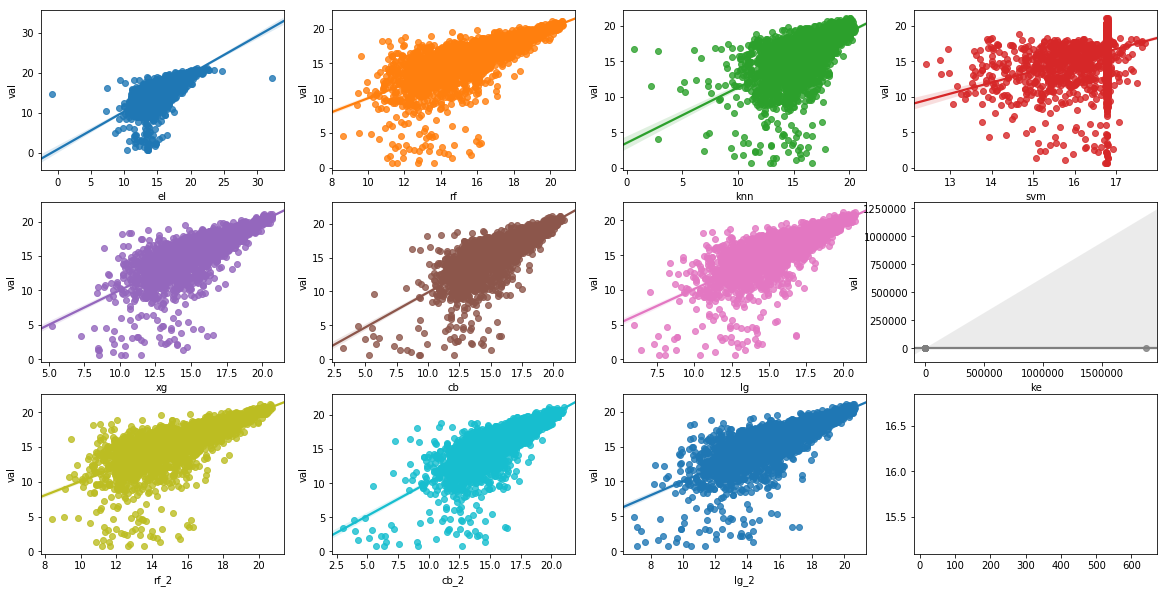

In [45]:
fig, axes = plt.subplots(3, 4, figsize = (20, 10))

for i, col in enumerate(meta_tr.columns[meta_tr.columns != 'val']):
  sns.regplot(x = col, y = 'val', data = meta_tr, ax = axes[i//4, i % 4])

In [0]:
meta_te.drop(['ke', 'svm'], axis = 1, inplace = True)
meta_tr.drop(['ke', 'svm'], axis = 1, inplace = True)

In [0]:
meta_tr.to_csv('meta_tr.csv', index = False)
meta_te.to_csv('meta_te.csv', index = False)

## 2nd Layer Modeling

In [0]:
meta_tr = pd.read_csv('meta_tr.csv')
meta_te = pd.read_csv('meta_te.csv')

In [232]:
print("The size of the train set ", meta_tr.shape)
print("The size of the test set ", meta_te.shape)

The size of the train set  (3000, 10)
The size of the test set  (4398, 9)


In [0]:
y = meta_tr.val
X_tr = meta_tr.drop('val', axis = 1)

te = meta_te

In [0]:
# Create meta-train set
nrow = X.shape[0]
ncol = 6
dims = np.zeros((nrow, ncol))

meta_tr = pd.DataFrame(dims, columns = ['lr', 'el', 'rd', 'svm', 'knn', 'rf'])
meta_tr['val'] = 0

# Create meta-test set
nrow = te.shape[0]
dims = np.zeros((nrow, ncol))
meta_te = pd.DataFrame(dims, columns = ['lr', 'el', 'rd', 'svm', 'knn', 'rf'])

# Cross Validation
k = 5
seed = 10
cv = KFold(n_splits = k, shuffle = True, random_state = seed)

### Linear Regression

In [235]:
model_lr = LinearRegression()
kfold_validate(X_tr, y, te, model_lr, 'lr')

=========0-th Fold Score: 1.8774563479189852
=========1-th Fold Score: 1.7265484178790167
=========2-th Fold Score: 1.849572390603977
=========3-th Fold Score: 1.9400484408343759
=========4-th Fold Score: 1.8036913547860691
=========Total Score:  1.8394633904044848


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### Elastic Net

In [236]:
model_el = ElasticNet(alpha = .005, l1_ratio = .3, max_iter = 3000)
kfold_validate(X_tr, y, te, model_el, 'el')

=========0-th Fold Score: 1.8783549310215022
=========1-th Fold Score: 1.7278595045359437
=========2-th Fold Score: 1.8481594847197171
=========3-th Fold Score: 1.9396519985691283
=========4-th Fold Score: 1.8018619827243674
=========Total Score:  1.8391775803141317


### Ridge Regression

In [241]:
model_rd = Ridge(alpha = .01, normalize = True)
kfold_validate(X_tr, y, te, model_rd, 'rd')

=========0-th Fold Score: 1.8811618911753147
=========1-th Fold Score: 1.734006302187174
=========2-th Fold Score: 1.8409395889858906
=========3-th Fold Score: 1.9406106860573475
=========4-th Fold Score: 1.797366786745541
=========Total Score:  1.8388170510302537


### 4. Linear SVR

In [193]:
model_svm = LinearSVR(epsilon= 0)
kfold_validate(X_tr, y, te, model_svm, 'svm')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


=========0-th Fold Score: 2.2145048498630477
=========1-th Fold Score: 1.83316936208566


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


=========2-th Fold Score: 1.8524742948732655
=========3-th Fold Score: 2.476461119961619


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


=========4-th Fold Score: 2.004532496538478
=========Total Score:  2.0762284246644143


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 5. knn

In [194]:
model_knn = KNeighborsRegressor(n_neighbors = 30, weights = 'distance', p = 1)
kfold_validate(X_tr, y, te, model_knn, 'knn')

=========0-th Fold Score: 1.9045762895785419
=========1-th Fold Score: 1.856762773319555
=========2-th Fold Score: 1.838444199621335
=========3-th Fold Score: 2.011920029328165
=========4-th Fold Score: 1.8074407409201505
=========Total Score:  1.8838288065535493


### 6. Shallow Random Forest

In [237]:
model_rf = RandomForestRegressor(n_estimators = 5000, max_depth = 7)
kfold_validate(X_tr, y, te, model_rf, 'rf')

=========0-th Fold Score: 1.8541244121704363
=========1-th Fold Score: 1.7628343540605775
=========2-th Fold Score: 1.8596724017532733
=========3-th Fold Score: 1.954847619494546
=========4-th Fold Score: 1.8335260209304425
=========Total Score:  1.8530009616818552


### Evaluation

In [199]:
meta_tr.sample(10)

,lr,el,rd,svm,knn,rf,val
1155,14.926999,14.922889,14.923255,15.950510,15.667919,15.419074,15.489411
375,17.181869,17.180912,17.183738,18.317912,17.053849,17.368149,16.670520
11,16.297211,16.307678,16.294363,16.862343,15.826167,16.195630,16.935319
1511,19.619287,19.595060,19.552263,19.420113,19.263075,19.202540,19.738573
2737,19.903847,19.920330,19.969632,20.293922,20.441823,20.547566,20.596199
2092,13.230618,13.256420,13.260161,13.715716,13.168084,13.868427,12.032796
2964,14.546862,14.567933,14.650791,15.597871,15.489470,14.876469,13.286597
1860,15.915604,15.923478,15.883350,14.393277,15.962716,15.843633,13.247651
1438,15.771919,15.744215,15.702147,15.779463,15.934902,15.891373,14.715630
1483,17.198583,17.191760,17.142332,16.242053,16.939270,17.111888,18.195033


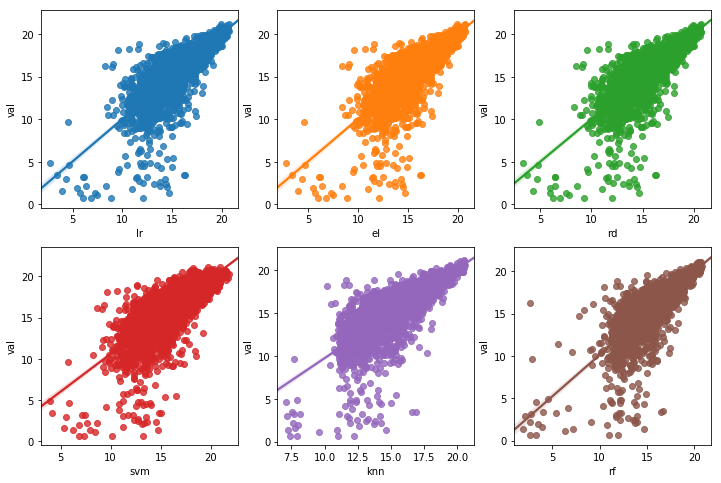

In [207]:
fig, axes = plt.subplots(2, 3, figsize = (12, 8))

for i, col in enumerate(meta_tr.columns[meta_tr.columns != 'val']):
  sns.regplot(x = col, y = 'val', data = meta_tr, ax = axes[i//3, i%3])

In [0]:
#final = (meta_te.lr + meta_te.el + meta_te.rf)/3
final = (meta_te.lr + meta_te.el + meta_te.rd)/3

## 3rd Layer Modeling

In [0]:
y = meta_tr.val
X_tr = meta_tr.drop('val', axis = 1)

te = meta_te

In [0]:
# Create meta-train set
nrow = X.shape[0]
ncol = 3
dims = np.zeros((nrow, ncol))

meta_tr = pd.DataFrame(dims, columns = ['lr', 'knn', 'rf'])
meta_tr['val'] = 0

# Create meta-test set
nrow = te.shape[0]
dims = np.zeros((nrow, ncol))
meta_te = pd.DataFrame(dims, columns = ['lr', 'knn', 'rf'])

# Cross Validation
k = 5
seed = 10
cv = KFold(n_splits = k, shuffle = True, random_state = seed)

In [218]:
model_lr = LinearRegression()
kfold_validate(X_tr, y, te, model_lr, 'lr')

=========0-th Fold Score: 1.8655442095669288
=========1-th Fold Score: 1.740358957605179
=========2-th Fold Score: 1.8505441601852337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


=========3-th Fold Score: 1.9502846992106584
=========4-th Fold Score: 1.801127603009748
=========Total Score:  1.8415719259155494


In [220]:
model_knn = KNeighborsRegressor(n_neighbors = 30, weights = 'distance', p = 1)
kfold_validate(X_tr, y, te, model_knn, 'knn')

=========0-th Fold Score: 1.9100963197361427
=========1-th Fold Score: 1.8386770297037158
=========2-th Fold Score: 1.8421032513580629
=========3-th Fold Score: 1.9838250696648594
=========4-th Fold Score: 1.8312264139134866
=========Total Score:  1.8811856168752534


In [222]:
model_rf = RandomForestRegressor(n_estimators = 1000, max_depth = 5)
kfold_validate(X_tr, y, te, model_rf, 'rf')

=========0-th Fold Score: 1.8682227214691538
=========1-th Fold Score: 1.789324168702125
=========2-th Fold Score: 1.8712203220673251
=========3-th Fold Score: 1.9944504239159673
=========4-th Fold Score: 1.7677073515245634
=========Total Score:  1.858184997535827


In [0]:
# Averaging the final result
final = (meta_te.lr + meta_te.knn + meta_te.rf)/3

## Submission

In [0]:
sub = pd.read_csv('sample_submission.csv')
sub['revenue'] = np.expm1(final)

name = 'mysub'
sub.to_csv(name + '.csv', index = False)
files.download('mysub.csv')

In [240]:
sub.shape

(4398, 2)